# Machine Learning Coursework 2

For coursework 2 you will be asked to train and evalute several different classifiers: Naïve Bayes classifier, Random Forest classifier, and kNN classifier using the iris dataset. You will be asked to answer a series of questions relating to each individual model and questions comparing each model. 

#### You are free to use the sklearn library. 


Notes:
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Code                                               | 7     |
| Code Report/comments                               | 6     |
| Model questions                                    | 14    |  
| Model comparision questions                        | 18    |
| Total available                                    |**45** |  

##### Remember to save your notebook as “CW2.ipynb”. It is a good idea to re-run the whole thing before saving and submitting. 










## 1. Classifiers [7 marks total]
Code and train your three classifiers in the cells below the corresponding header. You do not need to implement cross-validation in this coursework, simply fit the data. You are free to use sklearn and other packages where necessary.  



In [1]:
# import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets 

# load data
iris = datasets.load_iris() # load data 
print(iris.DESCR) # print dataset description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
def make_it_pandas(scikit_data):
    df = pd.DataFrame(scikit_data.data, columns = scikit_data.feature_names)
    df.columns = [c.replace(' (cm)', "") for c in df.columns]
    df.columns = [c.replace(' ', "_") for c in df.columns]
    df['target'] = pd.Series(scikit_data.target)
    df['target_names'] = df['target'].map({i:v for i,v in enumerate(scikit_data.target_names)})
    return(df)

In [4]:
df = make_it_pandas(iris)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# EDA

In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
 5   target_names  150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64


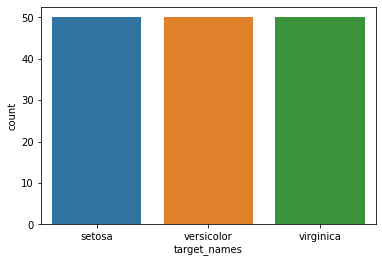

In [8]:
print(df['target_names'].value_counts())

sns.countplot(data = df, x='target_names' );

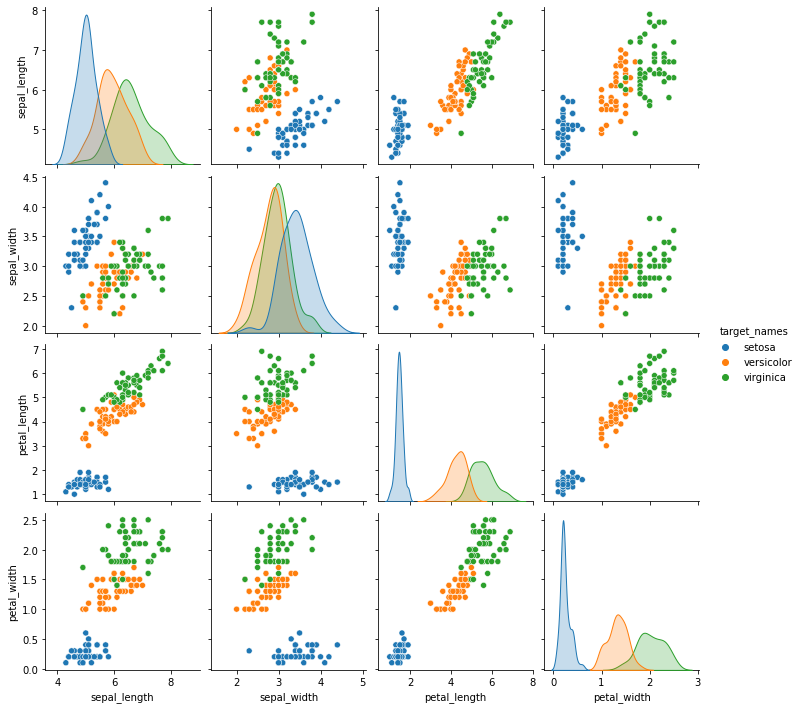

In [9]:
sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','target_names']] , hue='target_names',);

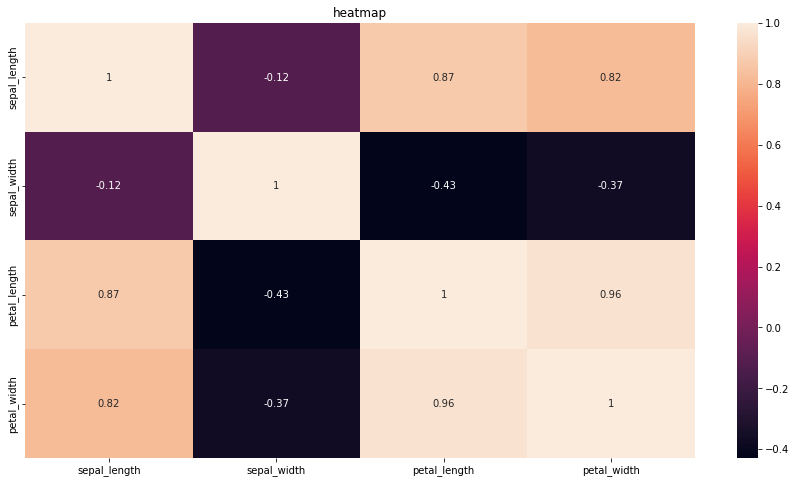

In [10]:
plt.figure(figsize=(15,8))
plt.title('heatmap')
sns.heatmap(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(),annot=True);

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [13]:
x = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True,
                                                   random_state= 55)

#remove the scale
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train_)
# x_test = scaler.transform(x_test_)

### 1.1 Naïve Bayes Classifier [2]
Train a naïve bayes classifier in python. 

Use your code to fit the data given above. 


In [14]:
#Write your code here
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(x_train, y_train)
y_pred = naive.predict(x_test)
#print(accuracy_score(y_test, y_pred))

print('sklearn confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('sklearn accuracy score: %s' % accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

sklearn confusion matrix:
[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]
sklearn accuracy score: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 1.2 Random Forest Classifier [3]
Train a random forest classifier in python. Use your code to fit the data given above. 

Evaluate feature performance of the model. 

Visualise the feature importance. 


In [15]:
#Write your code here
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=55,  ) #n_estimators=100
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

print('sklearn confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('sklearn accuracy score: %s' % accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.9333333333333333
sklearn confusion matrix:
[[ 9  0  0]
 [ 0  8  2]
 [ 0  0 11]]
sklearn accuracy score: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.80      0.89        10
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [16]:
importances = clf.feature_importances_
importances

array([0.11496372, 0.0242508 , 0.48321327, 0.3775722 ])

petal_length    0.483213
petal_width     0.377572
sepal_length    0.114964
sepal_width     0.024251
dtype: float64


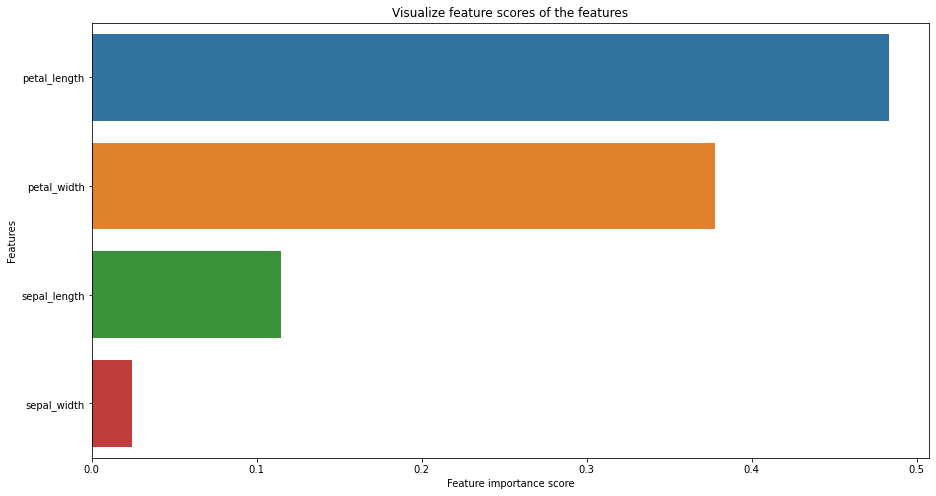

In [17]:
col_names = list(df.iloc[:, :-2].columns)
feature_scores = pd.Series(clf.feature_importances_, index=col_names).sort_values(ascending=False)

print(feature_scores)

# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=pd.DataFrame(feature_scores) )
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### 1.3 kNN Classifier [2]
Train a kNN classifier in python. 

Use your code to fit the data given above. 

In [18]:
#Write your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(accuracy_score(y_test, y_pred))

print('sklearn confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('sklearn accuracy score: %s' % accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.9666666666666667
sklearn confusion matrix:
[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]
sklearn accuracy score: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 2 Code Report [6 marks total]
In a markdown box, write a short report (no more than 500 words) that describes the workings of your code. 

In [19]:
#Write your answer here

#what had i describe? , ... give reason why give this k - say a bit more 

## 3 Model Questions [14 marks total]
Please answer the following questions relating to your classifiers. 

### 3.1 Naïves Bayes Questions [4]
Why do zero probabilities in our Naïve Bayes model cause problems? 

How can we avoid the problem of zero probabilities in our Naïve Bayes model? 

Please answer in the cell below.

In [20]:
#-- give reference - dc 

In [21]:
#Write your answer here

### 3.2 Random Forest Questions [6]
Which feature is the most important from your random forest classifier? 

Can any features be removed to increase accuracy of the model, if so which features? 

Explain why it would be useful to remove these features. 

Please answer in the cell below.

In [22]:
#Write your code here
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=55 ) #n_estimators=100
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

print('sklearn confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('sklearn accuracy score: %s' % accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.9333333333333333
sklearn confusion matrix:
[[ 9  0  0]
 [ 0  8  2]
 [ 0  0 11]]
sklearn accuracy score: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.80      0.89        10
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



petal_length    0.483213
petal_width     0.377572
sepal_length    0.114964
sepal_width     0.024251
dtype: float64


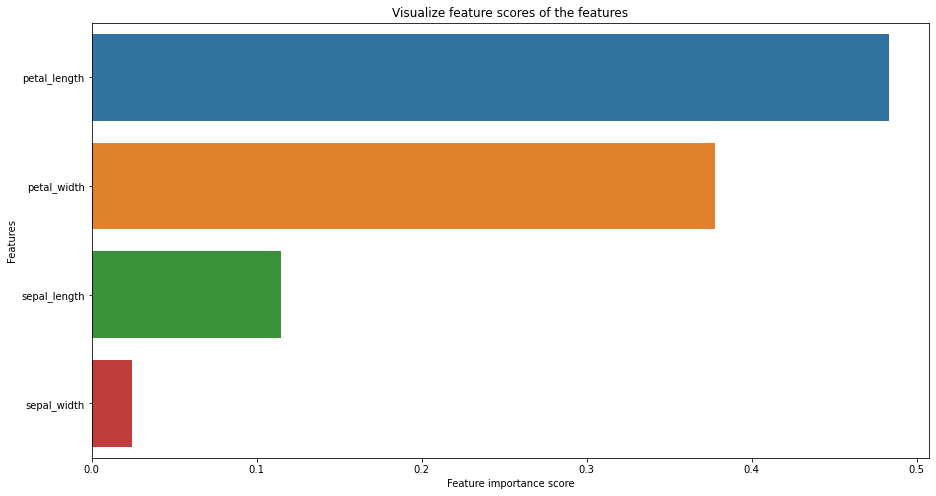

In [23]:
col_names = list(df.iloc[:, :-2].columns)
feature_scores = pd.Series(clf.feature_importances_, index=col_names).sort_values(ascending=False)

print(feature_scores)

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=pd.DataFrame(feature_scores) )
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [24]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa


In [25]:
xx = df.iloc[:, 2:4].values #-4
yy = df.iloc[:, -2].values

xx_train_, xx_test_, yy_train, yy_test= train_test_split(xx, yy,
                                                   test_size= 0.2,
                                                   shuffle= True,
                                                   random_state= 55)

scaler = StandardScaler()
xx_train = scaler.fit_transform(xx_train_)
xx_test = scaler.transform(xx_test_)

In [26]:
clf = RandomForestClassifier(max_depth=2, random_state=55 ) #n_estimators=100
clf.fit(xx_train, yy_train)
yy_pred = clf.predict(xx_test)
print(accuracy_score(yy_test, yy_pred))

print('sklearn confusion matrix:')
print(confusion_matrix(yy_test,yy_pred))
print('sklearn accuracy score: %s' % accuracy_score(yy_test,yy_pred))

from sklearn.metrics import classification_report
print(classification_report(yy_test, yy_pred))

0.9666666666666667
sklearn confusion matrix:
[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]
sklearn accuracy score: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [27]:
#Write your answer here

### 3.3 kNN Questions [4]
Do you think the kNN classifier is best suited to the iris dataset? 

What ideal qualities would the most appropriate dataset display?  

Please answer in the cell below.

In [28]:
#Write your answer here

# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(xx_train, yy_train)
# yy_pred = knn.predict(xx_test)

# print(accuracy_score(yy_test, yy_pred))

# print('sklearn confusion matrix:')
# print(confusion_matrix(yy_test,yy_pred))
# print('sklearn accuracy score: %s' % accuracy_score(yy_test,yy_pred))

# from sklearn.metrics import classification_report
# print(classification_report(yy_test,yy_pred))

## 4 Comparing Models [18 marks total]
Please answer the following questions comparing your classifiers.

### 4.1 Compare each model [3]
What differences do you see between your Naïve Bayes classifier, your random forest classifier, and your kNN classifier? 

In [29]:
#Write your answer here, not pertaining to iris

#find out the F1 score
# cant find the diff at the moment 

# - compare the 3 diff algo , no missing values

### 4.2 Accuracy [6]
Can you explain why there are differences in accuracy between the three classifiers? 

In [30]:
#Write your answer here

#-- all looks the same -- how? did i do something wrong? cos i std it 

In [31]:
#increase the test size ... differences due to algo ... relate it to the data. 

In [32]:
#knn and forest will "perform" better bcos of non-linear 

### 4.3 Appropriate Use [9]
When would it be appropriate to use each different classifier? 

Reference real-world situations and examples of specific data sets and explain why that classifier would be most appropriate for that use-case.

In [33]:
#Write your answer here, not pertaining to iris

#general knowledge ... cite some example.... give eg of dataset 